In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,324190,0,0,Rarephysbox,601,9,-1,0.6,"September 6, 2022",Abandonware. Do not buy. I will remove this wh...
1,324190,1,0,Butthog,148,20,1,7.7,"July 23, 2022",it is coming back :D
2,324190,2,0,master_rogul,762,9,1,7.8,"July 1, 2022",I think this is either a game that you will lo...
3,324190,2,0,pendrokar,200,17,-1,2.2,"May 29, 2022",The project has been abandoned by the original...
4,324190,2,0,76561198008868529,312,8,-1,0.5,"April 27, 2022",it was a promising Idea ... Last Update in 201...


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,-1,0.6,"September 6, 2022",Abandonware. Do not buy. I will remove this wh...
1,1,0,1,7.7,"July 23, 2022",it is coming back :D
2,2,0,1,7.8,"July 1, 2022",I think this is either a game that you will lo...
3,2,0,-1,2.2,"May 29, 2022",The project has been abandoned by the original...
4,2,0,-1,0.5,"April 27, 2022",it was a promising Idea ... Last Update in 201...


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"September 6, 2022",Abandonware. Do not buy. I will remove this wh...,0,0,0.6,-1
1,"July 23, 2022",it is coming back :D,1,0,7.7,1
2,"July 1, 2022",I think this is either a game that you will lo...,2,0,7.8,1
3,"May 29, 2022",The project has been abandoned by the original...,2,0,2.2,-1
4,"April 27, 2022",it was a promising Idea ... Last Update in 201...,2,0,0.5,-1
5,"March 25, 2022","DO NOT BUY THE GAMEthe ""game"" has been abandon...",5,0,2.8,-1
6,"February 17, 2022",A game that really understands what I want out...,1,0,3.9,1
7,"January 9, 2022",cant even get to the main menu. because login ...,4,0,3.1,-1
8,"January 4, 2022",Although under-budgeted and incomplete as of 2...,2,0,12.4,1
9,"November 20, 2020",Don't buy this game. there is no multyplayer a...,0,0,1.9,-1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  202 non-null    object 
 1   Review_Text     202 non-null    object 
 2   Num_Helpful     202 non-null    int64  
 3   Num_Funny       202 non-null    int64  
 4   Hours_Played    202 non-null    float64
 5   Recommend       202 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 9.6+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_33500/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"September 6, 2022",Abandonware. Do not buy. I will remove this wh...,0,0,0.6,-1,1662422400
1,"July 23, 2022",it is coming back :D,1,0,7.7,1,1658534400
2,"July 1, 2022",I think this is either a game that you will lo...,2,0,7.8,1,1656633600
3,"May 29, 2022",The project has been abandoned by the original...,2,0,2.2,-1,1653782400
4,"April 27, 2022",it was a promising Idea ... Last Update in 201...,2,0,0.5,-1,1651017600


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_33500/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"September 6, 2022",Abandonware. Do not buy. I will remove this wh...,0,0,0.6,-1,1662422400,2748
1,"July 23, 2022",it is coming back :D,1,0,7.7,1,1658534400,2742
2,"July 1, 2022",I think this is either a game that you will lo...,2,0,7.8,1,1656633600,2739
3,"May 29, 2022",The project has been abandoned by the original...,2,0,2.2,-1,1653782400,2734
4,"April 27, 2022",it was a promising Idea ... Last Update in 201...,2,0,0.5,-1,1651017600,2729


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"September 6, 2022",Abandonware. Do not buy. I will remove this wh...,0,0,0.6,-1,1662422400,2748
1,"July 23, 2022",it is coming back :D,1,0,7.7,1,1658534400,2742
2,"July 1, 2022",I think this is either a game that you will lo...,2,0,7.8,1,1656633600,2739
3,"May 29, 2022",The project has been abandoned by the original...,2,0,2.2,-1,1653782400,2734
4,"April 27, 2022",it was a promising Idea ... Last Update in 201...,2,0,0.5,-1,1651017600,2729


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2748,"September 6, 2022",Abandonware. Do not buy. I will remove this wh...
1,2742,"July 23, 2022",it is coming back :D
2,2739,"July 1, 2022",I think this is either a game that you will lo...
3,2734,"May 29, 2022",The project has been abandoned by the original...
4,2729,"April 27, 2022",it was a promising Idea ... Last Update in 201...


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2385,"September 19, 2015",8
1,2385,"September 20, 2015",6
2,2385,"September 21, 2015",2
3,2385,"September 22, 2015",6
4,2386,"September 25, 2015",1
...,...,...,...
141,2729,"April 27, 2022",2
142,2734,"May 29, 2022",2
143,2739,"July 1, 2022",2
144,2742,"July 23, 2022",2


<AxesSubplot:>

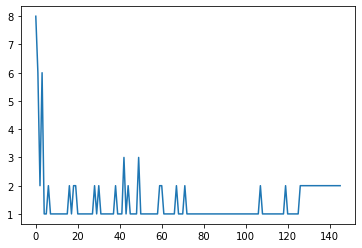

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

202

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.3835616438356164

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2385,22
1,2386,5
2,2387,5
3,2388,2
4,2390,1
...,...,...
99,2729,2
100,2734,2
101,2739,2
102,2742,2


<AxesSubplot:>

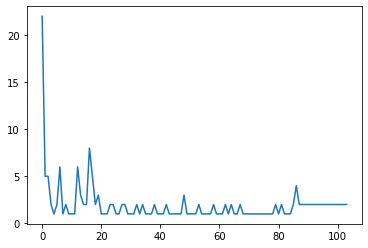

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

202

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

1.9423076923076923

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"September 6, 2022",Abandonware. Do not buy. I will remove this wh...,0,0,0.6,-1,1662422400,2748
1,"July 23, 2022",it is coming back :D,1,0,7.7,1,1658534400,2742
2,"July 1, 2022",I think this is either a game that you will lo...,2,0,7.8,1,1656633600,2739
3,"May 29, 2022",The project has been abandoned by the original...,2,0,2.2,-1,1653782400,2734
4,"April 27, 2022",it was a promising Idea ... Last Update in 201...,2,0,0.5,-1,1651017600,2729


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2385,222
1,2386,18
2,2387,74
3,2388,2
4,2390,1
...,...,...
99,2729,4
100,2734,4
101,2739,4
102,2742,2


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2385,96,0,1.0,10.090909
2386,10,0,4.0,3.600000
2387,68,1,2.0,14.800000
2388,2,0,1.0,1.000000
2390,1,1,1.0,1.000000
...,...,...,...,...
2729,2,2,2.0,2.000000
2734,2,2,2.0,2.000000
2739,2,2,2.0,2.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

1522

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

7.534653465346534

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2385,74
1,2386,3
2,2387,78
3,2388,0
4,2390,0
...,...,...
99,2729,0
100,2734,0
101,2739,0
102,2742,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2385,35,0,0.0,3.363636
2386,3,0,0.0,0.600000
2387,77,0,0.0,15.600000
2388,0,0,0.0,0.000000
2390,0,0,0.0,0.000000
...,...,...,...,...
2729,0,0,0.0,0.000000
2734,0,0,0.0,0.000000
2739,0,0,0.0,0.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

253

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

1.2524752475247525

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2385,97.2
1,2386,36.8
2,2387,48.0
3,2388,2.9
4,2390,2.4
...,...,...
99,2729,1.0
100,2734,4.4
101,2739,15.6
102,2742,15.4


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2385,17.6,0.1,1.80,4.418182
2386,11.2,3.0,8.80,7.360000
2387,18.8,0.9,8.40,9.600000
2388,2.4,0.5,1.45,1.450000
2390,2.4,2.4,2.40,2.400000
...,...,...,...,...
2729,0.5,0.5,0.50,0.500000
2734,2.2,2.2,2.20,2.200000
2739,7.8,7.8,7.80,7.800000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

1584.4

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

7.843564356435642

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2385,0.818182
1,2386,1.000000
2,2387,1.000000
3,2388,0.000000
4,2390,1.000000
...,...,...
99,2729,-1.000000
100,2734,-1.000000
101,2739,1.000000
102,2742,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2385,1,-1,1.0,0.818182
2386,1,1,1.0,1.000000
2387,1,1,1.0,1.000000
2388,1,-1,0.0,0.000000
2390,1,1,1.0,1.000000
...,...,...,...,...
2729,-1,-1,-1.0,-1.000000
2734,-1,-1,-1.0,-1.000000
2739,1,1,1.0,1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

-30

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

-0.1485148514851485

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"September 6, 2022",Abandonware. Do not buy. I will remove this wh...,0,0,0.6,-1,1662422400,2748
1,"July 23, 2022",it is coming back :D,1,0,7.7,1,1658534400,2742
2,"July 1, 2022",I think this is either a game that you will lo...,2,0,7.8,1,1656633600,2739
3,"May 29, 2022",The project has been abandoned by the original...,2,0,2.2,-1,1653782400,2734
4,"April 27, 2022",it was a promising Idea ... Last Update in 201...,2,0,0.5,-1,1651017600,2729


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"September 6, 2022",Abandonware. Do not buy. I will remove this wh...,0,0,0.002498,0.0,1.000000,2748
1,"July 23, 2022",it is coming back :D,1,0,0.037962,1.0,0.982311,2742
2,"July 1, 2022",I think this is either a game that you will lo...,2,0,0.038462,1.0,0.973664,2739
3,"May 29, 2022",The project has been abandoned by the original...,2,0,0.010490,0.0,0.960692,2734
4,"April 27, 2022",it was a promising Idea ... Last Update in 201...,2,0,0.001998,0.0,0.948113,2729
...,...,...,...,...,...,...,...,...
197,"September 20, 2015",This was a good sandbox game for any fans of f...,0,0,0.001499,1.0,0.000393,2385
198,"September 19, 2015",I've waited for this game for a while now. Aft...,0,0,0.013986,1.0,0.000000,2385
199,"September 19, 2015",Interesting premise for a game. Currently it i...,1,0,0.002498,1.0,0.000000,2385
200,"September 19, 2015","Day 1:As I walk through this mysterious land, ...",96,35,0.049950,1.0,0.000000,2385


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_33500/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"September 6, 2022",Abandonware. Do not buy. I will remove this wh...,0,0,0.002498,0.0,1.000000,2748
1,"September 6, 2022",Abandonware. Do not buy. I will remove this wh...,0,0,0.002498,0.0,1.000000,2748
2,"July 23, 2022",it is coming back :D,1,0,0.037962,1.0,0.982311,2742
3,"July 23, 2022",it is coming back :D,1,0,0.037962,1.0,0.982311,2742
4,"July 1, 2022",I think this is either a game that you will lo...,2,0,0.038462,1.0,0.973664,2739
5,"July 1, 2022",I think this is either a game that you will lo...,2,0,0.038462,1.0,0.973664,2739
6,"May 29, 2022",The project has been abandoned by the original...,2,0,0.010490,0.0,0.960692,2734
7,"May 29, 2022",The project has been abandoned by the original...,2,0,0.010490,0.0,0.960692,2734
8,"April 27, 2022",it was a promising Idea ... Last Update in 201...,2,0,0.001998,0.0,0.948113,2729
9,"April 27, 2022",it was a promising Idea ... Last Update in 201...,2,0,0.001998,0.0,0.948113,2729


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2385    [A very interesting concept and that alone mea...
2386    [YES to all of it:- Active mods- thousands of ...
2387    [While making a Water Tornado I made a spell t...
2388    [The game is crap it wouldnt load. I havent ev...
2390    [My recommendation comes with a caveat:  ONLY ...
2391    [so far it doesn't work but it is early access...
2392    [Abandoned by it's devs, but not before having...
2393    [This game is in early access, but the possibi...
2394    [Updated: 2019/05/11Seems this has been abando...
2395    [EDIT: The developers ran out of money and are...
2398    [This game is great! Now all we need is multip...
2399    [Games that tackles magic were always  my favo...
2400    [You haven't really played CodeSpells until yo...
2402    [You can easely make your own spells. Nuff sai...
2403    [I have bought this game and i feel like I mus...
2404    [Abandoned by devs, Code Spells is kind of lik...
2405    [EDIT: This game has been abandoned and the li..

In [54]:
# storing data in JSON format
df_text_list.to_json('codespells_text.json', orient = 'split', compression = 'infer')

In [55]:
# reading the JSON file
codespells_text = pd.read_json('codespells_text.json')
print(codespells_text)

            name  index                                               data
0    Review_Text   2385  [A very interesting concept and that alone mea...
1    Review_Text   2386  [YES to all of it:- Active mods- thousands of ...
2    Review_Text   2387  [While making a Water Tornado I made a spell t...
3    Review_Text   2388  [The game is crap it wouldnt load. I havent ev...
4    Review_Text   2390  [My recommendation comes with a caveat:  ONLY ...
5    Review_Text   2391  [so far it doesn't work but it is early access...
6    Review_Text   2392  [Abandoned by it's devs, but not before having...
7    Review_Text   2393  [This game is in early access, but the possibi...
8    Review_Text   2394  [Updated: 2019/05/11Seems this has been abando...
9    Review_Text   2395  [EDIT: The developers ran out of money and are...
10   Review_Text   2398  [This game is great! Now all we need is multip...
11   Review_Text   2399  [Games that tackles magic were always  my favo...
12   Review_Text   2400  

In [56]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('codespells_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_33500/2728216187.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [57]:
codespells_mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
codespells_mean_day.to_csv('codespells_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_33500/1538803690.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  codespells_mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [58]:
# storing data in CSV format
codespells_review = df_sorted.to_csv('codespells_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])